In [7]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [8]:
year = 2022 #GP year
gp = 'Bahrain' # GP name
event = 'Q' # Q for qualifying, FP1 for free practice 1, R for race

In [9]:

# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,6)
#fastf1.Cache.enable_cache('\cache')
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)


In [10]:
# Get qualification session
session = fastf1.get_session(year, gp, event)
laps = session.load_laps(with_telemetry=True)
laps.dropna(subset=['Driver'], inplace = True)
laps = laps.pick_accurate()

core           INFO 	Loading laps for Bahrain Grand Prix - Qualifying [v2.1.13]
api         WARNING 	

NO CACHE! Api caching has not been enabled! 
	It is highly recommended to enable this feature for much faster data loading!
	Use `fastf1.Cache.enable_cache('path/to/cache/')`

api            INFO 	Fetching timing data...
api            INFO 	Parsing timing data...
api            INFO 	Fetching timing app data...
core           INFO 	Processing timing data...
api            INFO 	Fetching driver list...
api            INFO 	Fetching session status data...
api            INFO 	Fetching track status data...
api            INFO 	Fetching car data...
api            INFO 	Parsing car data...
api            INFO 	Fetching position data...
api            INFO 	Parsing position data...
api            INFO 	Fetching weather data...
core           INFO 	Loaded data for 20 drivers: ['55', '4', '24', '44', '16', '3', '63', '18', '11', '6', '20', '77', '14', '47', '22', '10', '23', '1', '27', '31']

In [11]:
# Get an array of all drivers
drivers = pd.unique(laps['Driver'])
print(drivers)

# Get each driver fastest lap
list_fastest_laps = list()
for drv in drivers:
    drvs_fastest_lap = laps.pick_driver(drv).pick_fastest()
    list_fastest_laps.append(drvs_fastest_lap)
fastest_laps = Laps(list_fastest_laps).sort_values(by='LapTime').reset_index(drop=True)

['VER' 'LEC' 'PER' 'RUS' 'SAI' 'HAM' 'MAG' 'BOT' 'ZHO' 'STR' 'NOR' 'HUL'
 'GAS' 'MSC' 'RIC' 'ALO' 'ALB' 'OCO' 'LAT' 'TSU']


In [12]:
# Get the pole lap
pole_lap = fastest_laps.pick_fastest()
fastest_laps['LapTimeDelta'] = fastest_laps['LapTime'] - pole_lap['LapTime']
fastest_laps['LapTimeDelta'] = fastest_laps['LapTimeDelta'].dt.total_seconds()
#print(fastest_laps[['Driver', 'LapTime', 'LapTimeDelta']])

In [13]:
# Get all team colors
team_colors = list()
for index, lap in fastest_laps.iterlaps():
    color = fastf1.plotting.team_color(lap['Team'])
    team_colors.append(color)

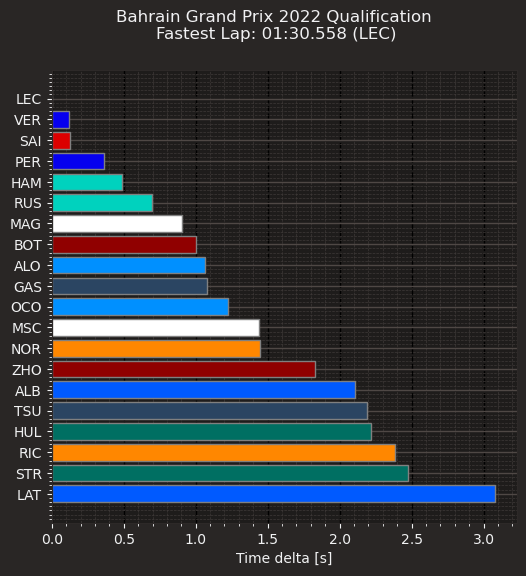

In [16]:
# Plot the table
fig, ax = plt.subplots()
ax.barh(fastest_laps.index, fastest_laps['LapTimeDelta'], color=team_colors, edgecolor='grey')
ax.set_yticks(fastest_laps.index)
ax.set_yticklabels(fastest_laps['Driver'])
ax.invert_yaxis()
ax.set_axisbelow(True)
ax.xaxis.grid(True, which='major', linestyle='--', color='black', zorder=-1000)

lap_time_string = strftimedelta(pole_lap['LapTime'], '%m:%s.%ms')
plt.suptitle(f"{session.weekend.name} {session.weekend.year} Qualification \n"
f"Fastest Lap: {lap_time_string} ({pole_lap['Driver']})")
plt.xlabel('Time delta [s]')
plt.show()

In [19]:
lec_lap = laps.pick_driver('LEC').pick_fastest()
lec_tel = lec_lap.get_telemetry()
ver_lap = laps.pick_driver('VER').pick_fastest()
ver_tel = ver_lap.get_telemetry()

Text(0.5, 1.0, 'Bahrain Grand Prix 2022 \nFP1, Leclerc vs Verstappen')

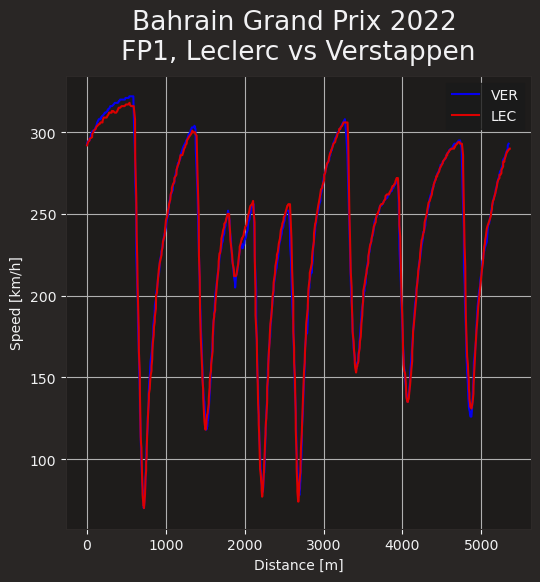

In [21]:
plt.plot(ver_tel['Distance'], ver_tel['Speed'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(lec_tel['Distance'], lec_tel['Speed'], label='LEC', color=fastf1.plotting.team_color('Ferrari'))
plt.xlabel('Distance [m]')
plt.ylabel('Speed [km/h]')
plt.grid()
plt.legend()
plt.title(f"{session.weekend.name} {session.weekend.year} \nFP1, Leclerc vs Verstappen")